# Visualize model performance on Test set

In [1]:
import os
import yaml
import pickle
import time

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# local imports
import model, tools

In [2]:
# import config params
params = yaml.load(open(os.getcwd()+'/config.yaml'), yaml.Loader) 

if params['use_gpu']:
    print('\tSetting GPU configurations.')
    tools.set_gpu_configurations(params) 

	Setting GPU configurations.
Setting GPU configurations.
1 Physical GPUs, 1 Logical GPUs


In [3]:
# Load model
RNN = tf.keras.models.load_model(os.getcwd()+'/saved_models/'+params['model_name']+'.h5')
RNN.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                20992     
_________________________________________________________________
dense (Dense)                (None, 28)                1820      
Total params: 22,812
Trainable params: 22,812
Non-trainable params: 0
_________________________________________________________________


## Load Test data

I will load test observations, and compact them and their corresponding predictions single arrays.

In [4]:
test_files = os.listdir(os.getcwd()+'/data_processed/Test/')

# clean
if 'readme_test.md' in test_files: 
    test_files.remove('readme_test.md')
if '.gitignore' in test_files: 
    test_files.remove('.gitignore')

# test_files = np.array(test_files) 
print(len(test_files)) 

115084


In [5]:
X_test = [] # final Test array

for file in test_files:
    # load 2D arrays
    x = np.load('{}/data_processed/Test/{}'.format(os.getcwd(), file), 
                allow_pickle=True) 
    
    # RNN preprocessing to 3D arrays
    x = tools.RNN_multivariate_processing(
        array = x, 
        len_input = params['len_input']+params['len_prediction'])
    
    X_test.append(x) 

In [6]:
# Compact in final np.array's
X_test = np.concatenate(X_test) 

Y_test = X_test[ : , params['len_input']: , 0 ]
X_test = X_test[ : , :params['len_input'] , : ] 

print(X_test.shape)
print(Y_test.shape) 

(115084, 128, 17)
(115084, 28)


## Check general performance

I will error statistics on the totality of test set.

In [17]:
P = []  # final array for predictions

for i in range(X_test.shape[0]):
    x = np.expand_dims(X_test[i,:,:], axis=0)
    p = RNN.predict(x)
    P.append(p)
    
P = np.concatenate(P)
print(P.shape) 

(115084, 28)


## Visualizations

I will now visually inspect individual trends and their predictions.

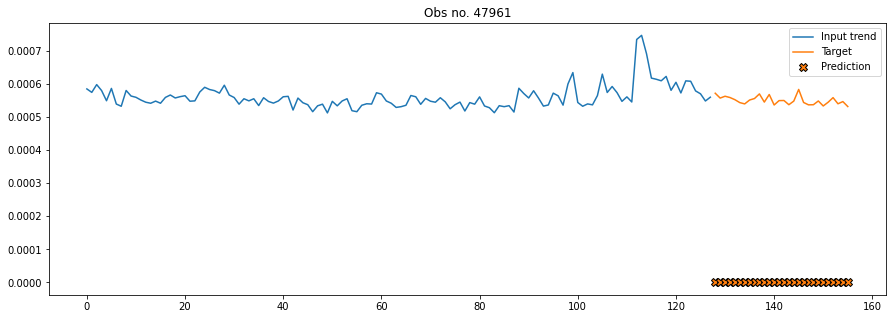

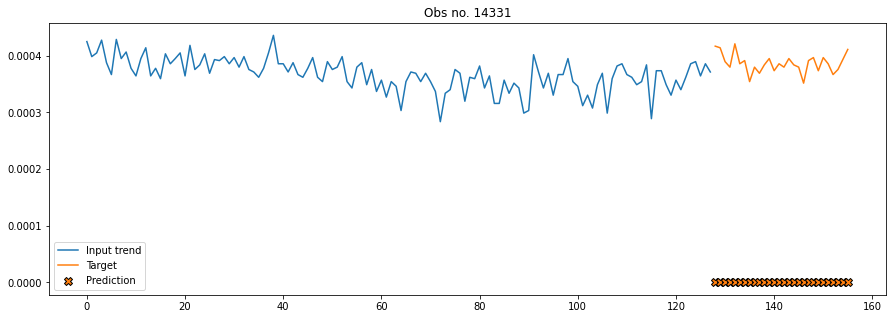

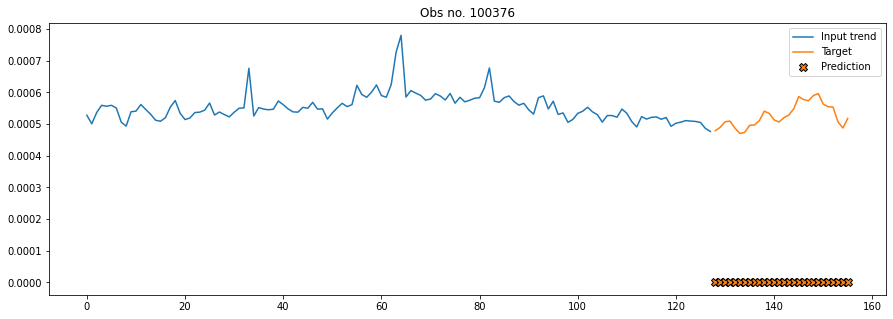

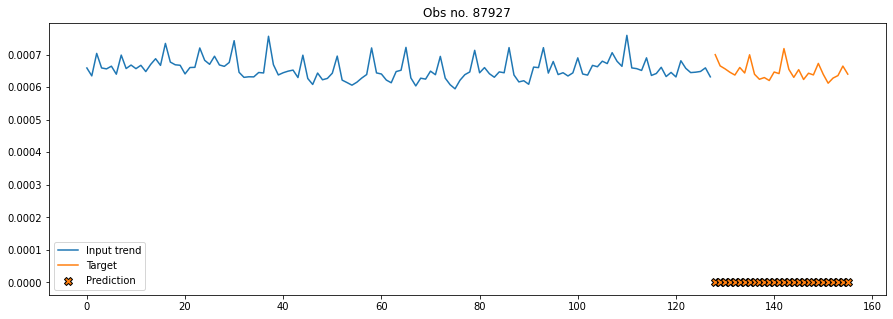

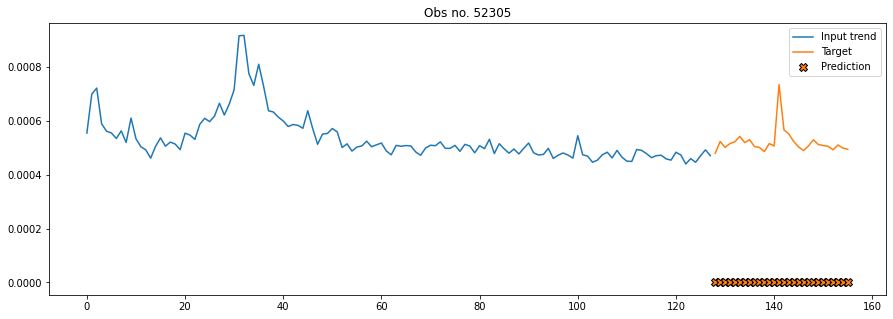

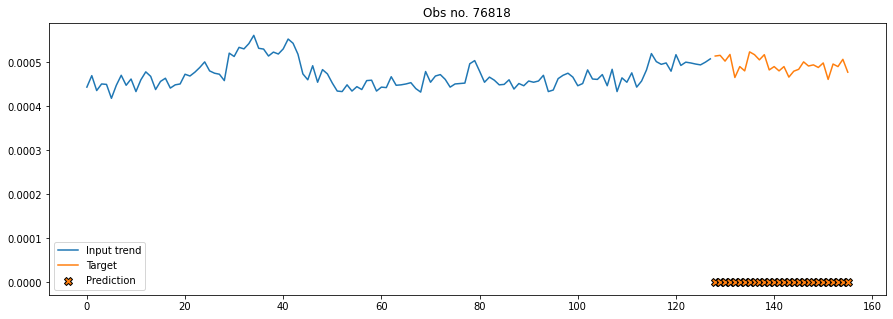

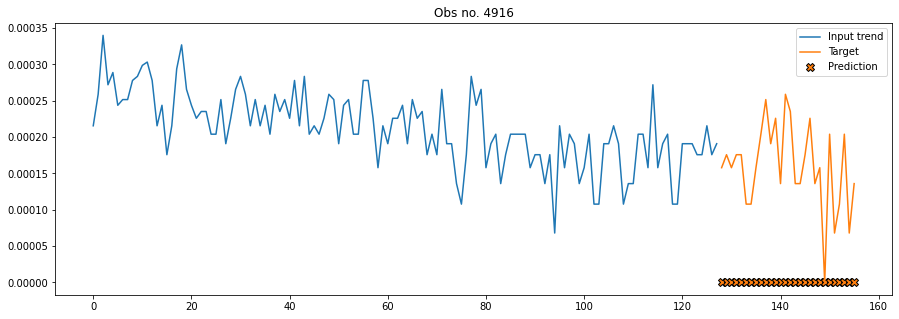

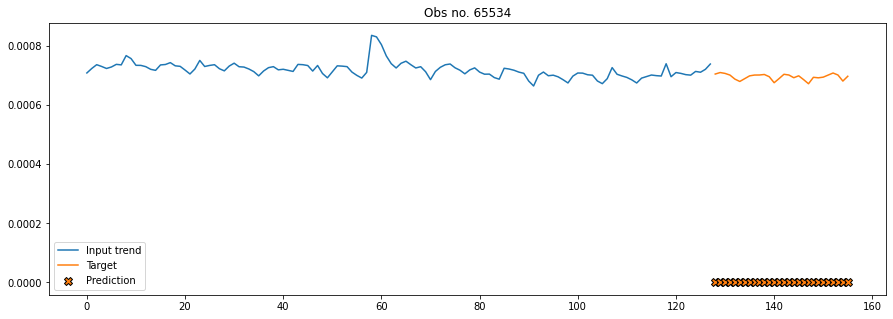

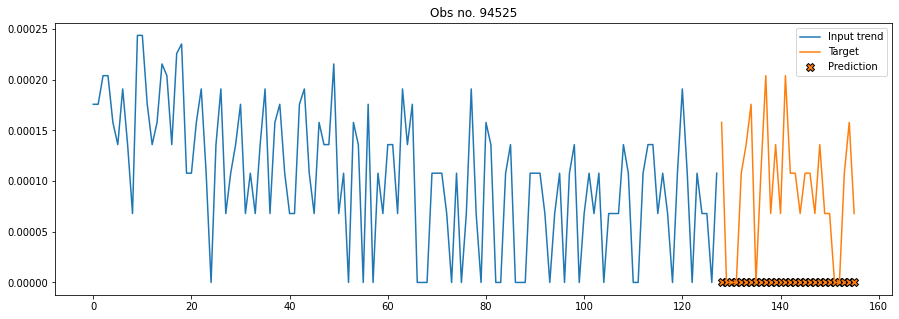

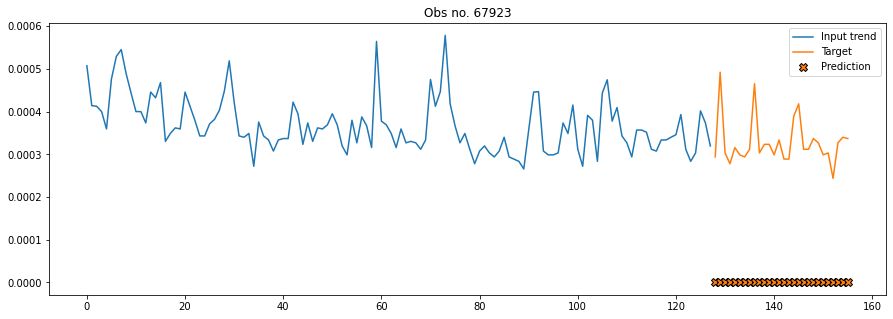

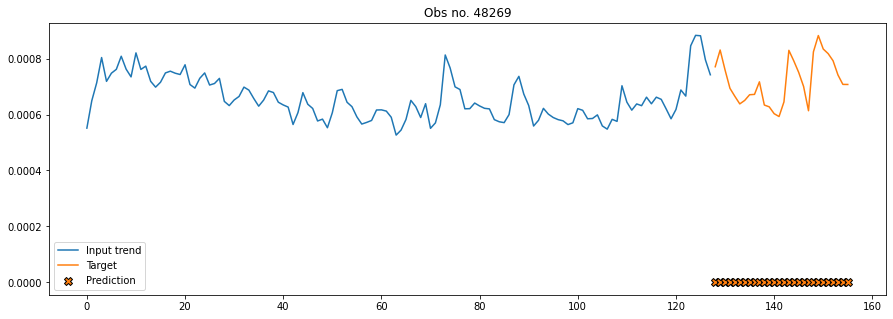

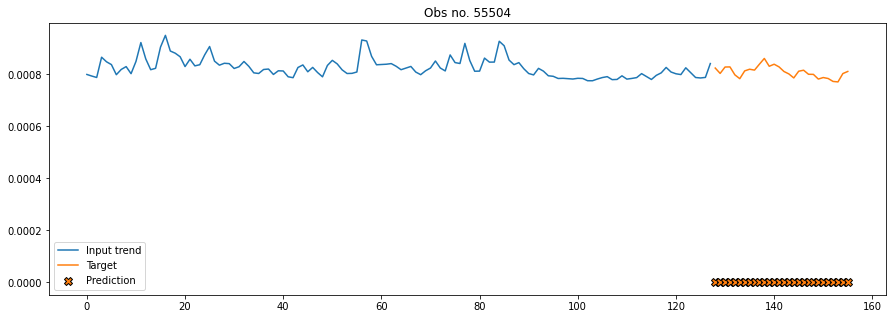

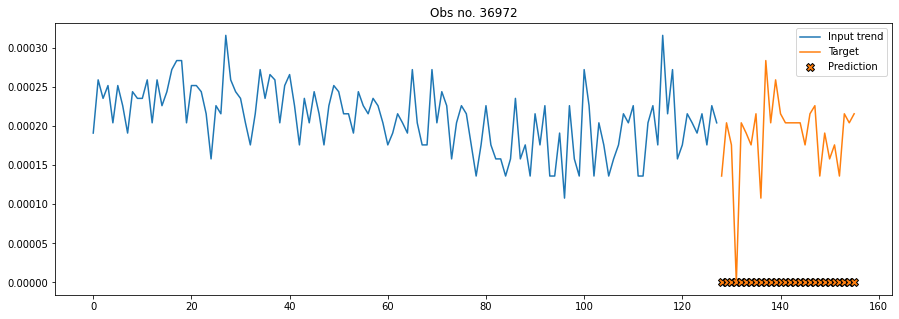

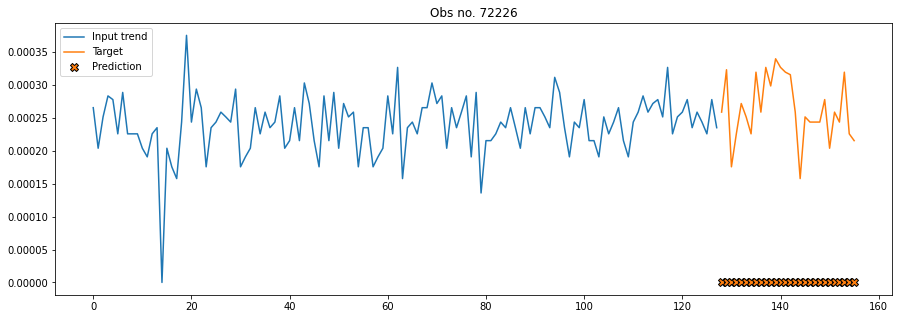

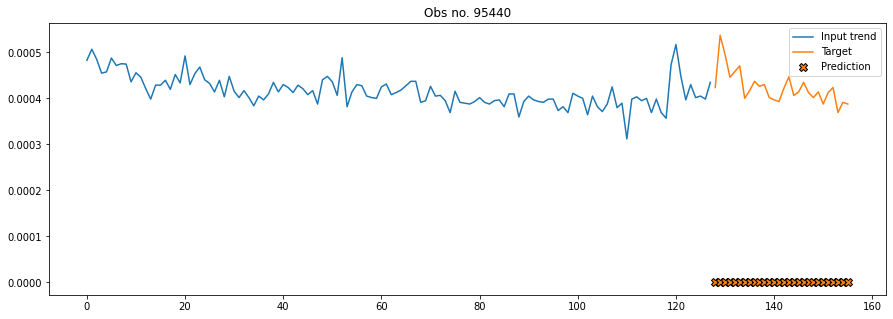

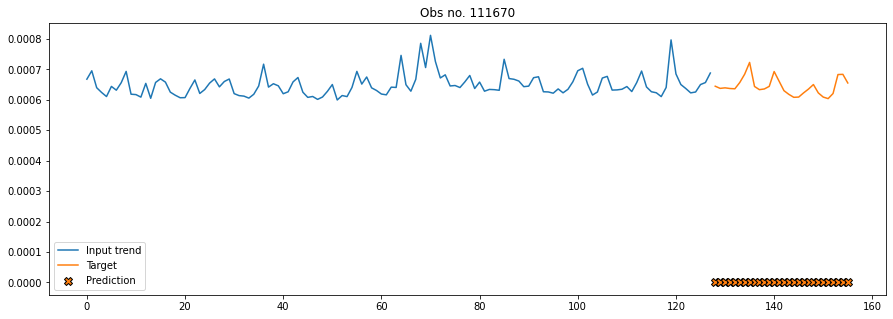

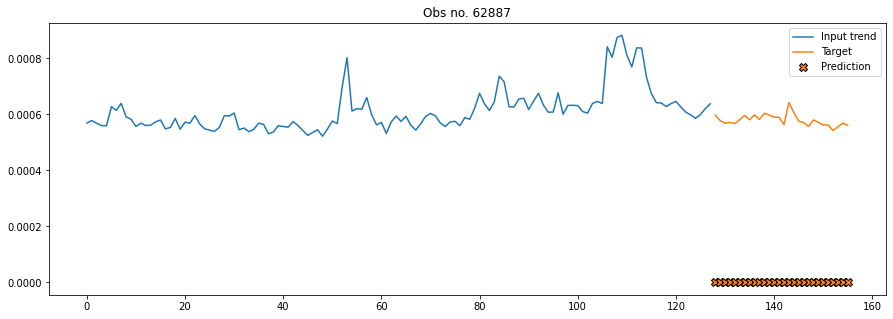

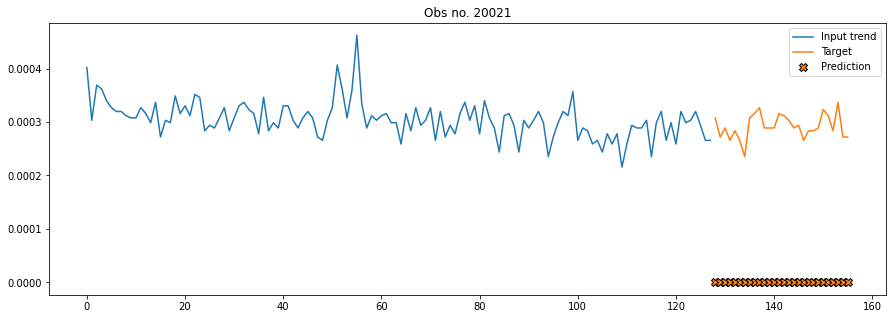

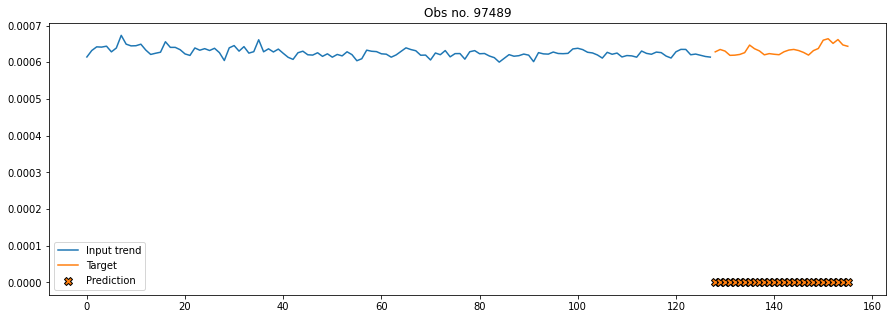

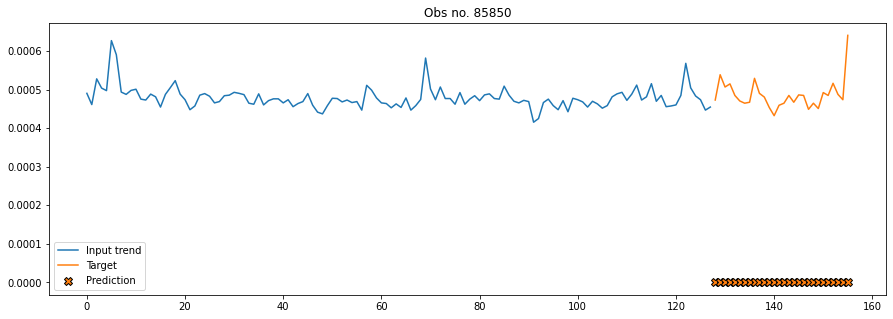

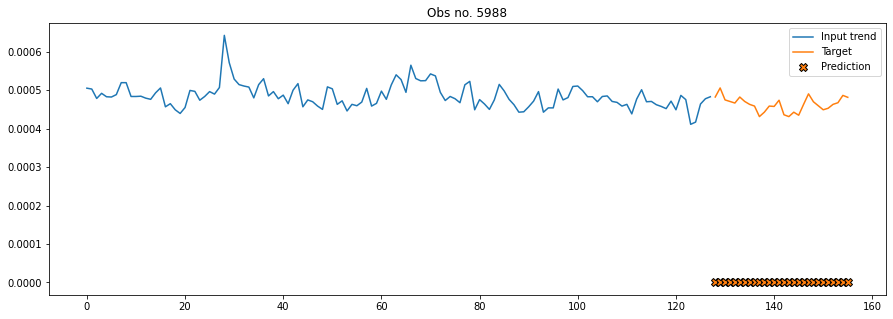

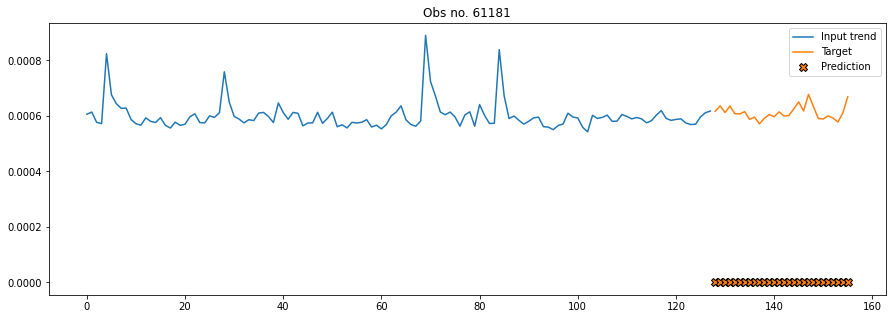

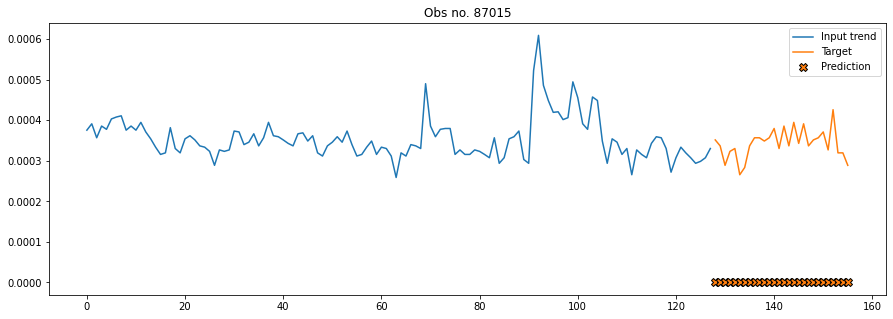

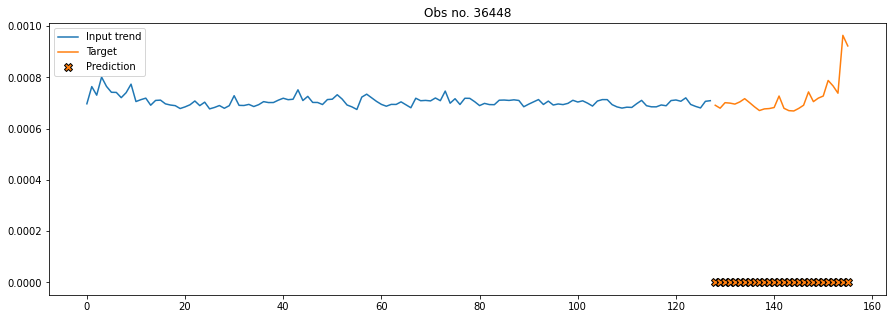

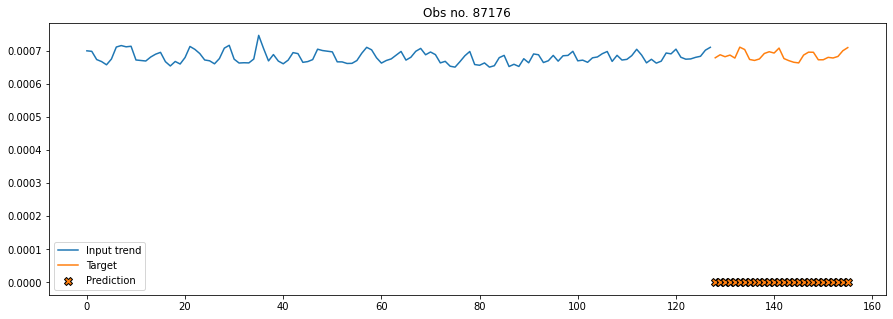

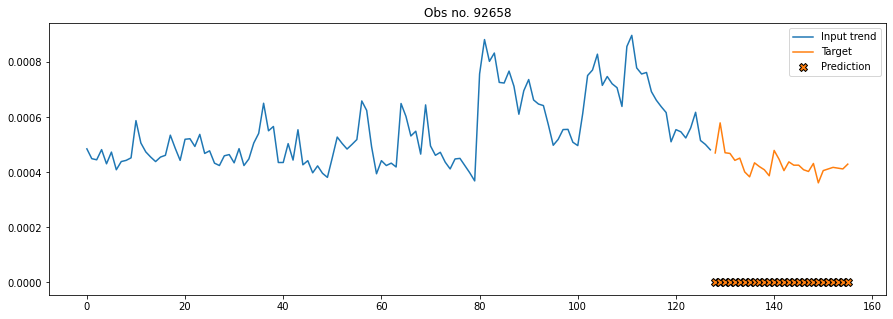

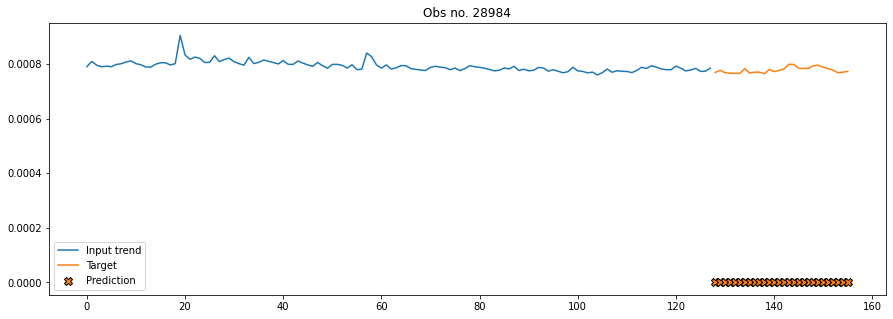

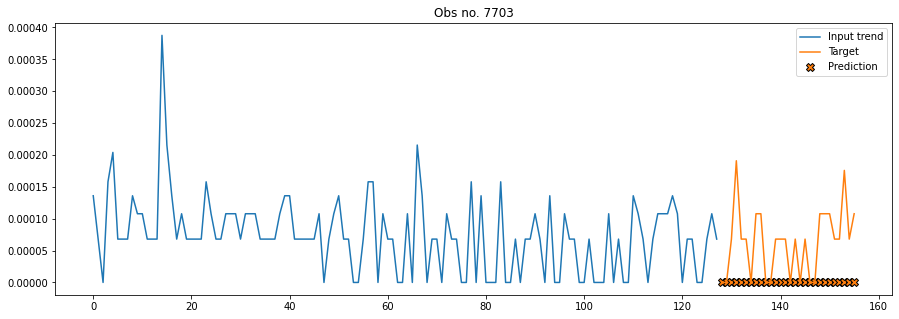

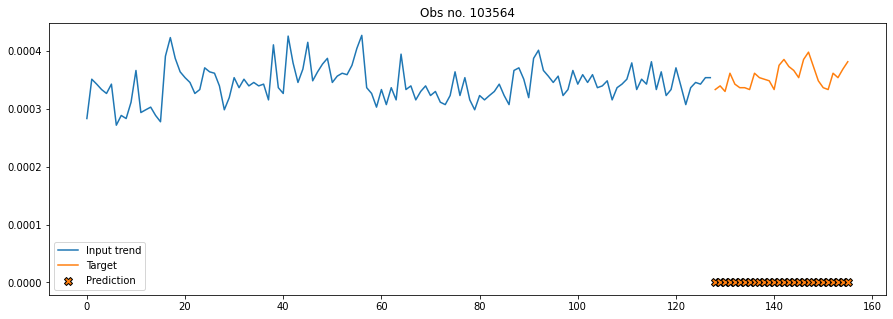

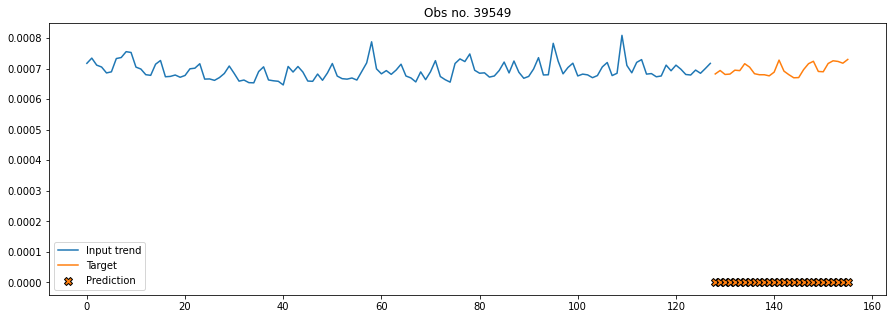

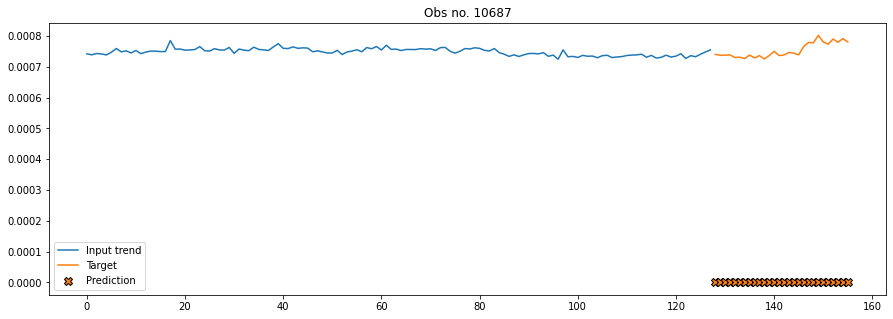

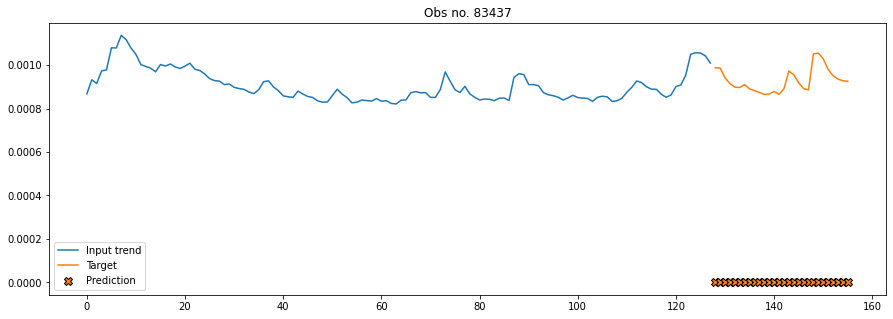

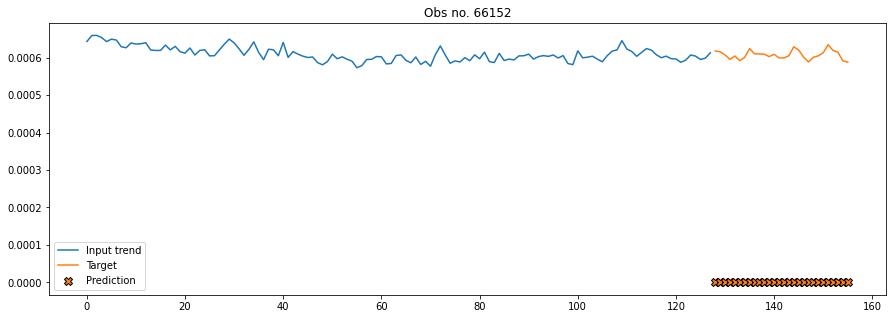

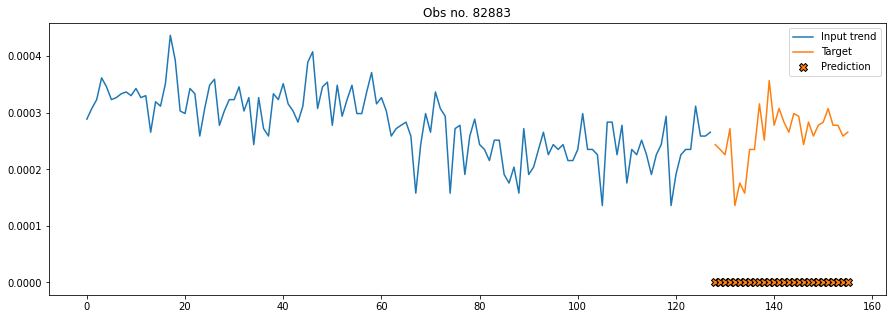

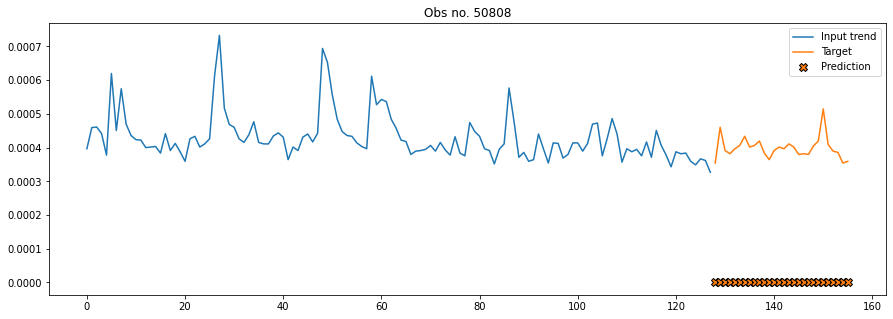

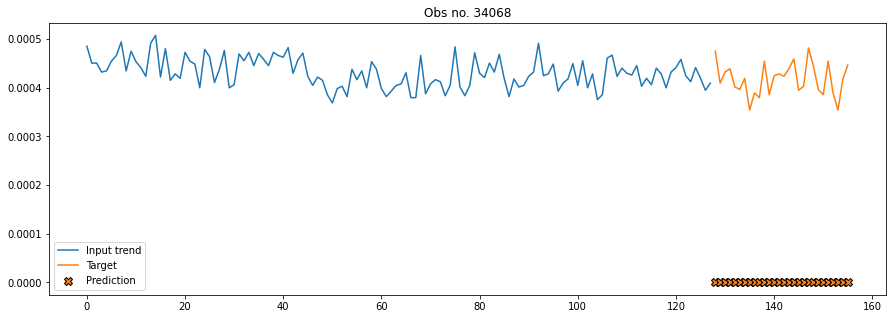

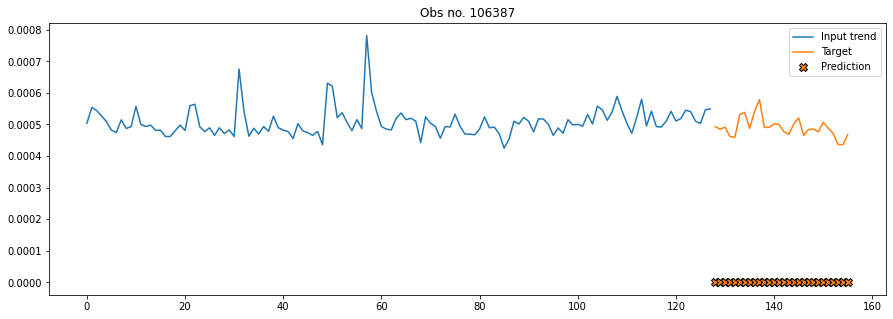

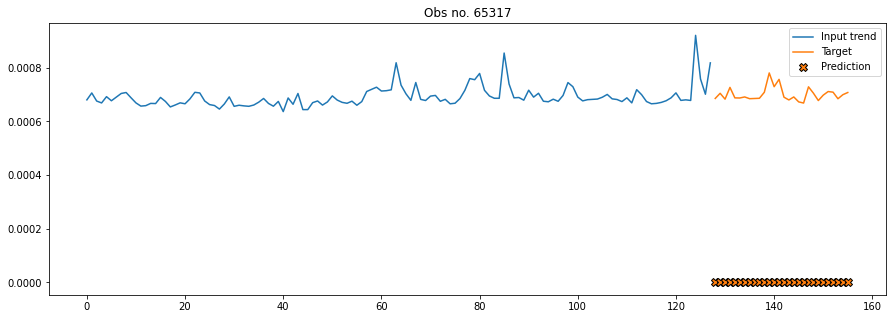

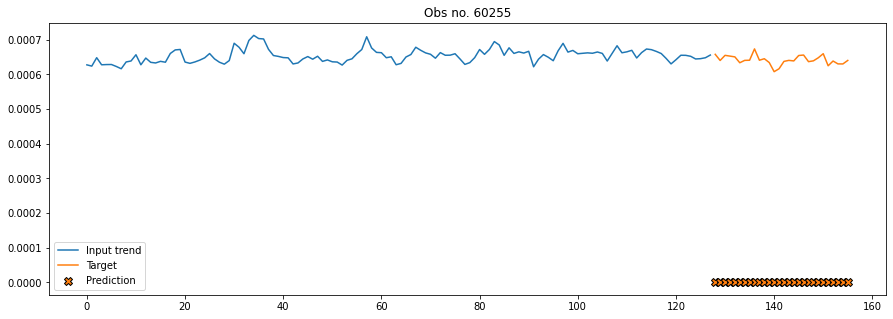

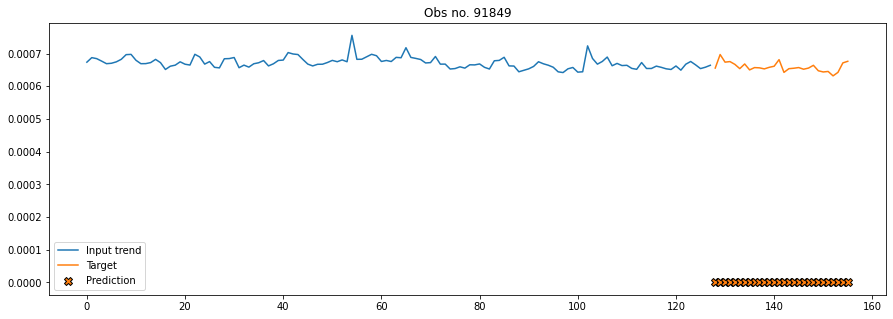

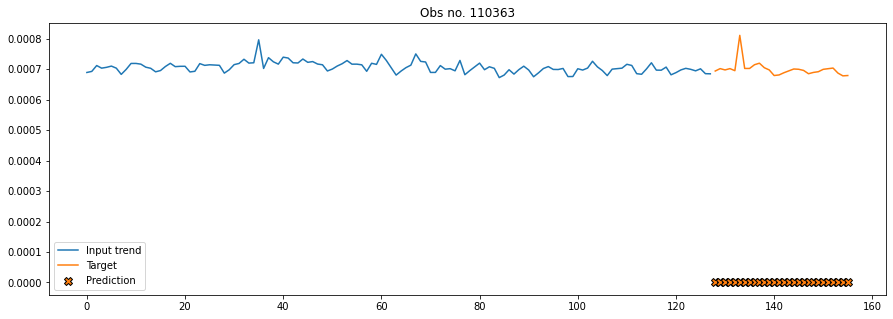

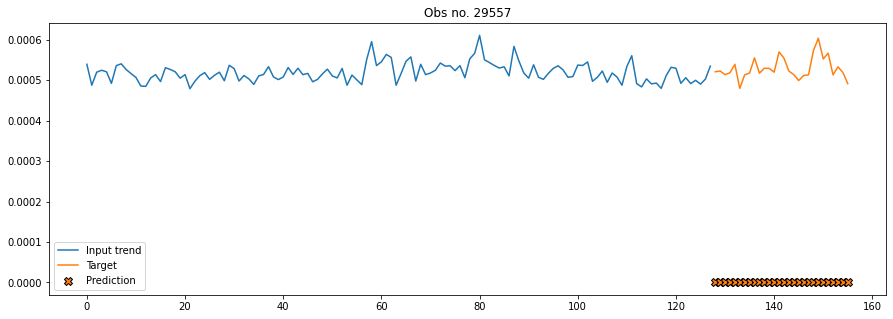

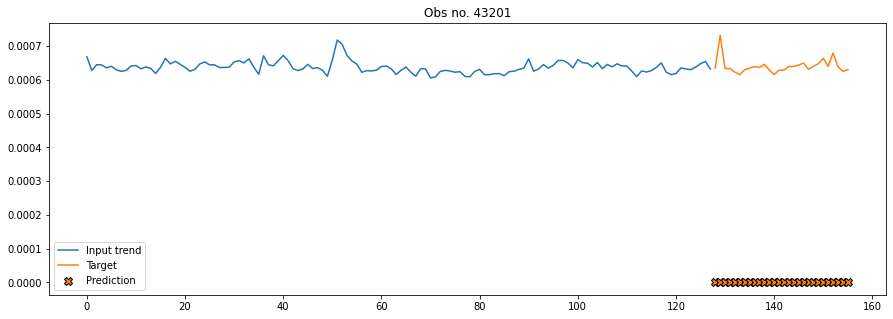

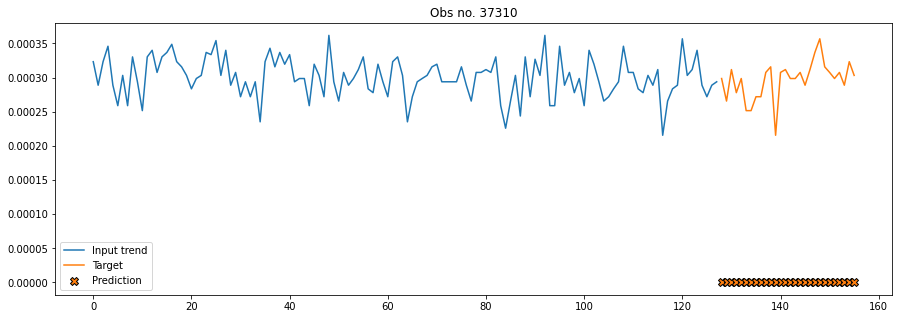

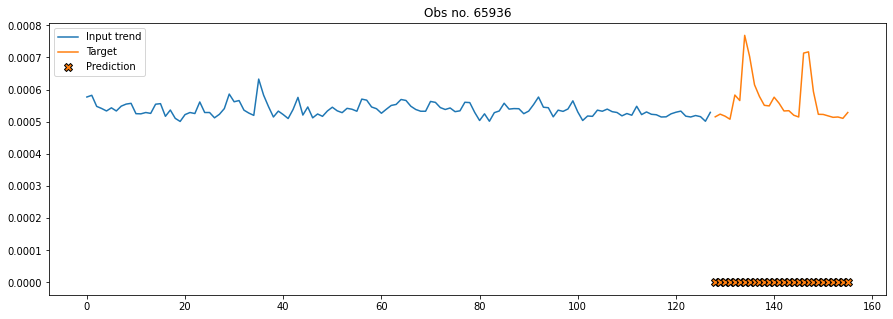

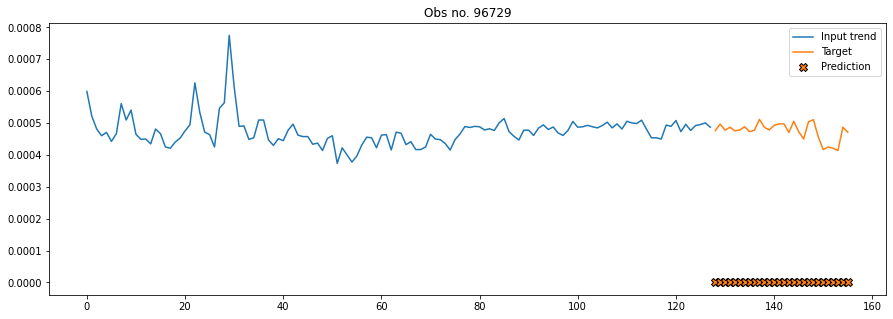

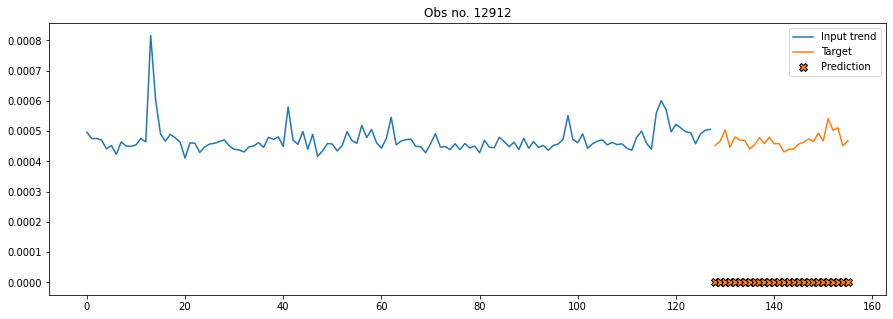

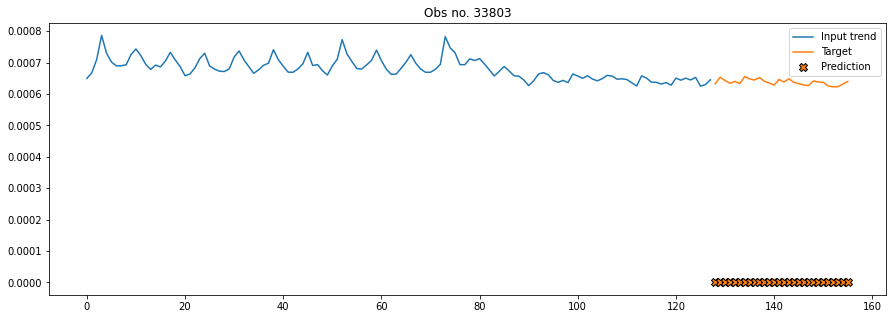

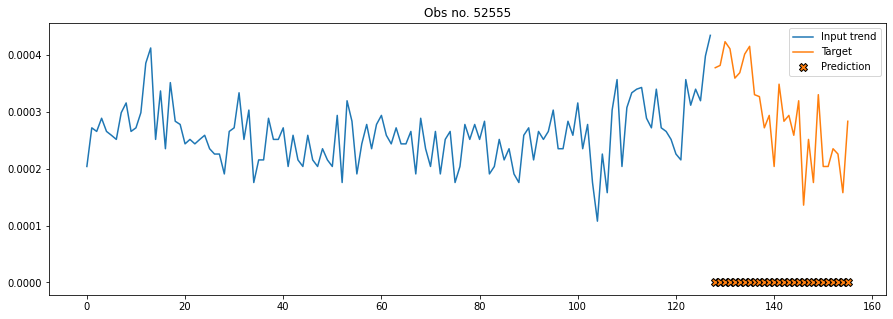

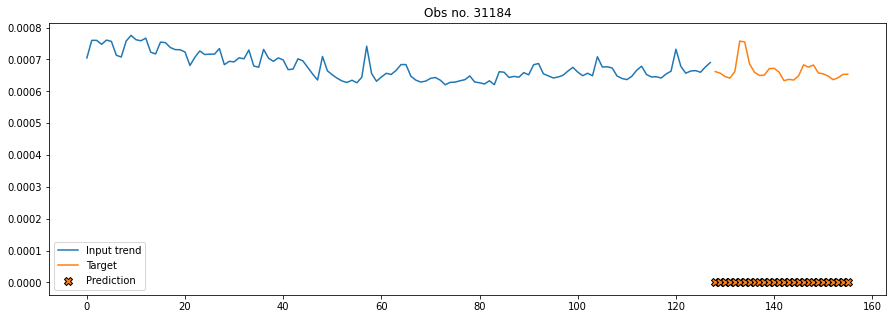

In [23]:
# Take a random sample of obs. to display
sample = np.random.choice(X_test.shape[0], size=50, replace=False)

for i in sample:
    x = np.squeeze(X_test[i,:,0])
    y = Y_test[i,:]
    p = P[i,:]
    
    plt.figure(figsize=(15,5))
    plt.plot(np.concatenate([x, np.repeat(np.nan, params['len_prediction'])]), 
             label = 'Input trend')
    plt.plot(np.concatenate([np.repeat(np.nan, params['len_input']), y]), 
             label = 'Target')
    plt.scatter(
        x = np.arange(params['len_input']+params['len_prediction']),
        y = np.concatenate([np.repeat(np.nan, params['len_input']), p]),
        marker='X', edgecolors='k', label='Prediction', c='#ff7f0e', s=64)
    plt.title('Obs no. {}'.format(i))
    plt.legend()
    plt.show() 
